In [1]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.


In [54]:
# https://youtu.be/oB35sV1npVI
"""
Use this code to get your BRATS 2020 dataset ready for semantic segmentation. 
Code can be divided into a few parts....
#Combine 
#Changing mask pixel values (labels) from 4 to 3 (as the original labels are 0, 1, 2, 4)
#Visualize
https://pypi.org/project/nibabel/
All BraTS multimodal scans are available as NIfTI files (.nii.gz) -> commonly used medical imaging format to store brain imagin data obtained using MRI and describe different MRI settings
T1: T1-weighted, native image, sagittal or axial 2D acquisitions, with 1–6 mm slice thickness.
T1c: T1-weighted, contrast-enhanced (Gadolinium) image, with 3D acquisition and 1 mm isotropic voxel size for most patients.
T2: T2-weighted image, axial 2D acquisition, with 2–6 mm slice thickness.
FLAIR: T2-weighted FLAIR image, axial, coronal, or sagittal 2D acquisitions, 2–6 mm slice thickness.
#Note: Segmented file name in Folder 355 has a weird name. Rename it to match others.
"""

'\nUse this code to get your BRATS 2020 dataset ready for semantic segmentation. \nCode can be divided into a few parts....\n#Combine \n#Changing mask pixel values (labels) from 4 to 3 (as the original labels are 0, 1, 2, 4)\n#Visualize\nhttps://pypi.org/project/nibabel/\nAll BraTS multimodal scans are available as NIfTI files (.nii.gz) -> commonly used medical imaging format to store brain imagin data obtained using MRI and describe different MRI settings\nT1: T1-weighted, native image, sagittal or axial 2D acquisitions, with 1–6 mm slice thickness.\nT1c: T1-weighted, contrast-enhanced (Gadolinium) image, with 3D acquisition and 1 mm isotropic voxel size for most patients.\nT2: T2-weighted image, axial 2D acquisition, with 2–6 mm slice thickness.\nFLAIR: T2-weighted FLAIR image, axial, coronal, or sagittal 2D acquisitions, 2–6 mm slice thickness.\n#Note: Segmented file name in Folder 355 has a weird name. Rename it to match others.\n'

In [2]:
pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=76f17805fff04c97697db5c0cf5a64464a24f45e2dedb3c5987b605cf63f1918
  Stored in directory: c:\users\computing\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attemptin

In [5]:
import numpy as np
import nibabel as nib
import glob
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:

TRAIN_DATASET_PATH = r"C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/"

#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

In [31]:

test_image_flair=nib.load(TRAIN_DATASET_PATH + "BraTS2021_00005/BraTS2021_00005_flair.nii.gz").get_fdata()
print(test_image_flair.max())

3703.0


In [36]:
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [37]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + "BraTS2021_00005/BraTS2021_00005_t1.nii.gz").get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

In [38]:
test_image_t1ce=nib.load(TRAIN_DATASET_PATH + "BraTS2021_00005/BraTS2021_00005_t1ce.nii.gz").get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

In [39]:
test_image_t2=nib.load(TRAIN_DATASET_PATH + "BraTS2021_00005/BraTS2021_00005_t2.nii.gz").get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

In [40]:
test_mask=nib.load(TRAIN_DATASET_PATH + "BraTS2021_00005/BraTS2021_00005_seg.nii.gz").get_fdata()
test_mask=test_mask.astype(np.uint8)

In [41]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

[0 1 2 4]
[0 1 2 3]


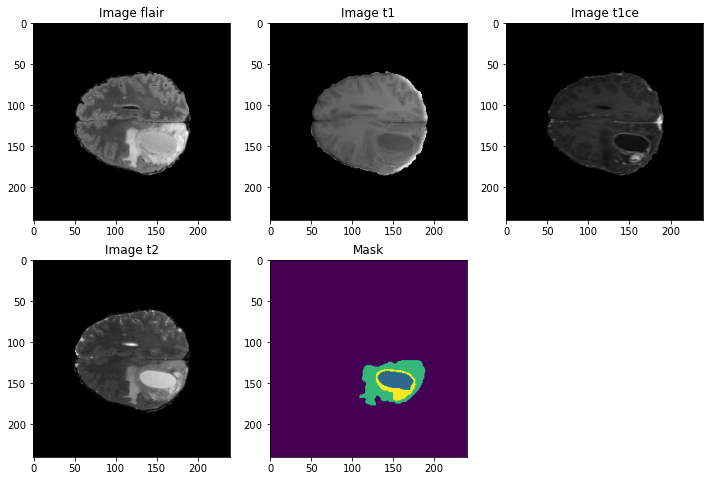

In [53]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [56]:

##################################################
#PART 2: Explore the process of combining images to channels and divide them to patches
#Includes...
#Combining all 4 images to 4 channels of a numpy array.
#
################################################
#Flair, T1CE, annd T2 have the most information
#Combine t1ce, t2, and flair into single multichannel image

combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

In [57]:
#Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
#cropping x, y, and z
#combined_x=combined_x[24:216, 24:216, 13:141]

combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

In [58]:
#Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

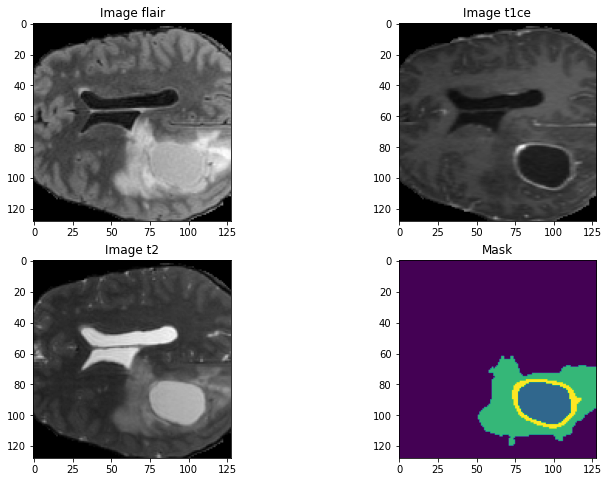

In [65]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [69]:
imsave('C:/Users/Computing/Desktop/archive/combined255.tif', combined_x)
np.save('C:/Users/Computing/Desktop/archive/combined255.npy', combined_x)

In [71]:
#Verify image is being read properly
#my_img=imread('BraTS2020_TrainingData/combined255.tif')

my_img=np.load('C:/Users/Computing/Desktop/archive/combined255.npy')

test_mask = to_categorical(test_mask, num_classes=4)

In [72]:
#End of understanding the dataset. Now get it organized.
#####################################

#Now let us apply the same as above to all the images...
#Merge channels, crop, patchify, save
#GET DATA READY =  GENERATORS OR OTHERWISE


In [73]:
#Keras datagenerator does ntot support 3d

# # # images lists harley

t1_list = sorted(glob.glob('C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/*/*t1.nii'))
t2_list = sorted(glob.glob('C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/*/*t2.nii'))
t1ce_list = sorted(glob.glob('C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/*/*t1ce.nii'))
flair_list = sorted(glob.glob('C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/*/*flair.nii'))
mask_list = sorted(glob.glob('C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/*/*seg.nii'))

In [74]:
#Each volume generates 18 64x64x64x4 sub-volumes. 
#Total 369 volumes = 6642 sub volumes

for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   
   

In [78]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [79]:
################################################################
#Repeat the same from above for validation data folder OR
#Split training data into train and validation

"""
Code for splitting folder into train, test, and val.
Once the new folders are created rename them and arrange in the format below to be used
for semantic segmentation using data generators. 
pip install split-folders
"""
import splitfolders  # or import split_folders

input_folder = 'C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/input_data_3channels/'
output_folder = 'C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/input_data_128/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values
########################################

ValueError: The provided input folder "C:/Users/Computing/Desktop/archive/BraTS2021_Training_Data/input_data_3channels/" does not exists.